<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


### Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [GitHub](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail? 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [25]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import dtale

Downloading dataset using:  
`!python -m wget $<URL> -o <Filename.extension>`

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
print(df.shape)
print(df.price)
display(df.head())

(48895, 16)
0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
cat_cols = list(df.dtypes[df.dtypes == 'O'].index)

for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


In [60]:
# Using D-Tale for Auto EDA

dtale.show(df)

C:\Users\Rohan\anaconda3\lib\site-packages\dtale\utils.py:502: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\Rohan\anaconda3\lib\site-packages\dtale\utils.py:504: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



In [5]:
df = df[[
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]]
print(df.shape)
display(df.head(10))

(48895, 8)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


### Question 1

Find a feature with missing values. How many missing values does it have?

In [6]:
missings = [f'{x}: {df[x].isna().sum()}: {round(df[x].isna().sum()/df.shape[0] * 100, 2)}%' for x in df.columns if df[x].isna().sum() > 0]
print('\n'.join(missings))

reviews_per_month: 10052: 20.56%


### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [7]:
df.minimum_nights.median()

3.0

### Split the data (Manually)

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.


In [8]:
def train_val_test_split(df, pred_col, val_size=None, test_size=None, train_size=None, random_state=None, shuffle=True):
   
    if train_size == None and val_size == None and test_size == None:
        val_size, test_size = 0.2, 0,2
    elif train_size == None and val_size == None and test_size != None:
        val_size, test_size = 0.2, test_size
    elif train_size == None and val_size != None and test_size == None:
        val_size, test_size = val_size, 0.2
    elif train_size == None and val_size != None and test_size != None:
        val_size, test_size = val_size, test_size
    elif train_size != None and val_size == None and test_size == None:
        val_size, test_size = (1 - train_size)/2, (1 - train_size)/2
    elif train_size != None and val_size == None and test_size != None:
        val_size, test_size = train_size - test_size, test_size
    elif train_size != None and val_size != None and test_size == None:
        val_size, test_size = val_size, train_size - val_size
    elif train_size != None and val_size != None and test_size != None:
        val_size, test_size = val_size, test_size
        
    n = len(df)

    n_val = int(n * val_size)
    n_test = int(n * test_size)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    
    if random_state == None:
        random_state = 0
    
    np.random.seed(random_state)
        
    if shuffle != False:
        np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    X_train = df_train.drop(pred_col, axis = 1)
    y_train = df_train[pred_col]
    X_val = df_val.drop(pred_col, axis = 1)
    y_val = df_val[pred_col]
    X_test = df_test.drop(pred_col, axis = 1)
    y_test = df_test[pred_col]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(
    df = df,
    pred_col = 'price',
    train_size = .6,
    test_size = .2,
    val_size = .2,
    shuffle = True,
    random_state = 42
)

In [10]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [11]:
y_train.head()

879       89
44383     30
15394    120
43230    470
16332    199
Name: price, dtype: int64

In [12]:
len(X_train) + len(X_val) + len(X_test) == len(df)

True

In [13]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [14]:
y_train.head()

879      4.499810
44383    3.433987
15394    4.795791
43230    6.154858
16332    5.298317
Name: price, dtype: float64

### Question 3

* We need to deal with missing values for the column from Question #1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [15]:
def missing_fill(num):
    Xtrain, Xval, Xtest = X_train.copy(), X_val.copy(), X_test.copy()
    Xtrain.reviews_per_month = Xtrain.reviews_per_month.fillna(num)
    Xval.reviews_per_month = Xval.reviews_per_month.fillna(num)
    Xtest.reviews_per_month = Xtest.reviews_per_month.fillna(num)
    return Xtrain, Xval, Xtest

In [17]:
def fit (X, y):
    X_biased = np.c_[np.ones(X.shape[0]), X]
    
    #XTX = X.Tdot(X)
    #XTX_inv = np.linalg.inv(XTX)
    #w = XTX_inv.dot(X.T).dot(y)
    w = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T).dot(y)
    
    #return w[0], w[1:]
    return w

def predict(X,w):
    y_pred = w[0] + X.dot(w[1:])
    
    return y_pred

def rmse(y, y_):
    error = y - y_
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)

In [18]:
class LinearRegressor:
    def __init__(self, regularize=False, r=None):
        self.regularize = regularize
        self.r = r
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_biased = np.column_stack([np.ones(self.X.shape[0]), self.X])
        
        X = X_biased
        self.gram = X.T.dot(X)
        
        if self.regularize == True and self.r != None :
            self.regularization(self.r)
        elif self.regularize ==True and self.r == None:
            self.regularization()

        gram_inv = np.linalg.inv(self.gram)
        self.w = gram_inv.dot(X.T).dot(self.y)
        #self.w = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T).dot(self.y)
        print(f'Intercept: {self.w[0]},\nWeight Matrix: {self.w[1:]}')
            
    def predict(self, X):
        y_pred = self.w[0] + X.dot(self.w[1:])
        return y_pred
    
    def rmse(self, y, y_):
        rmse = np.sqrt(np.mean((y - y_)**2))
        return rmse
    
    def regularization(self, r=0.001):
        self.gram += r * np.eye(self.gram.shape[0])
        return self.gram

In [16]:
X_train0, X_val0, X_test0 = missing_fill(0)
X_train_m, X_val_m, X_test_m = missing_fill(X_train.reviews_per_month.mean())

In [19]:
model0 = LinearRegressor()
model0.fit(X_train0, y_train)
y_pred0_val = model0.predict(X_val0)
y_pred0_test = model0.predict(X_test0)
error0_val = model0.rmse(y_val, y_pred0_val)
error0_test = model0.rmse(y_test, y_pred0_test)
print('RMSE: ', round(error0_val, 2))
print('RMSE: ', round(error0_test, 2))

Intercept: -419.91265863459563,
Weight Matrix: [ 1.30676225e+00 -5.02167855e+00 -5.59803110e-04 -4.07634896e-04
 -8.25470066e-03  1.33371320e-03  6.50203890e-04]
RMSE:  0.64
RMSE:  0.65


In [20]:
model_m = LinearRegressor()
model_m.fit(X_train_m, y_train)
y_pred_m_val = model_m.predict(X_val_m)
y_pred_m_test = model_m.predict(X_test_m)
error_m_val = model_m.rmse(y_val, y_pred_m_val)
error_m_test = model_m.rmse(y_test, y_pred_m_test)
print('RMSE: ', round(error_m_val, 2))
print('RMSE: ', round(error_m_test, 2))

Intercept: -423.539308195656,
Weight Matrix: [ 1.31148321e+00 -5.06799071e+00 -4.87741552e-04 -6.63849280e-04
  5.34563274e-03  1.32706019e-03  6.38794182e-04]
RMSE:  0.64
RMSE:  0.65


<AxesSubplot:xlabel='price', ylabel='Count'>

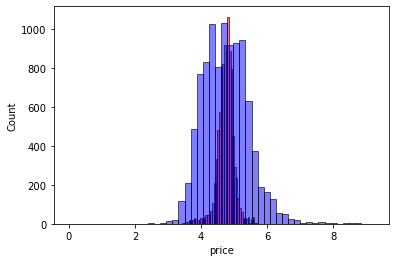

In [26]:
sns.histplot(y_pred0_val, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

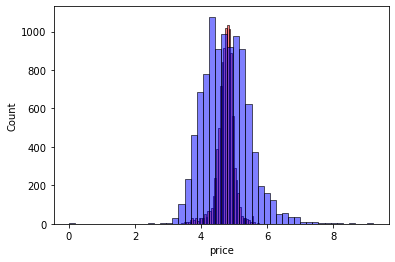

In [27]:
sns.histplot(y_pred0_test, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_test, color = 'blue', alpha = 0.5, bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

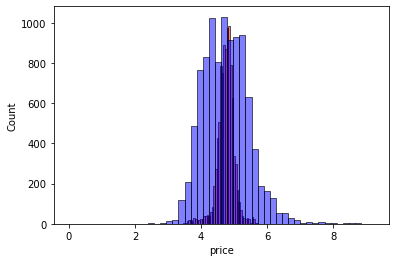

In [28]:
sns.histplot(y_pred_m_val, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

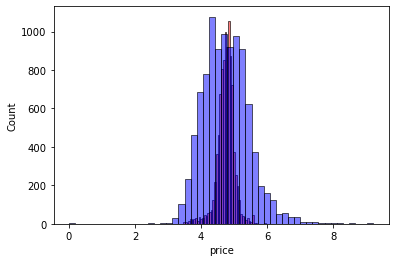

In [29]:
sns.histplot(y_pred_m_test, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_test, color = 'blue', alpha = 0.5, bins = 50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.


In [30]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for v in r:
    print('For regularization using "r" =', v)
    print('******'*7)
    
    model0 = LinearRegressor(regularize=True, r=v)
    model0.fit(X_train0, y_train)
    
    y_pred0_val = model0.predict(X_val0)
    y_pred0_test = model0.predict(X_test0)
    
    error0_val = model0.rmse(y_val, y_pred0_val)
    error0_test = model0.rmse(y_test, y_pred0_test)
    
    print('------'*7)
    print('RMSE on Validation: ', round(error0_val, 4))
    print('RMSE on Test: ', round(error0_test, 4))
    print('#'*60)

For regularization using "r" = 0
******************************************
Intercept: -419.91265863459563,
Weight Matrix: [ 1.30676225e+00 -5.02167855e+00 -5.59803110e-04 -4.07634896e-04
 -8.25470066e-03  1.33371320e-03  6.50203890e-04]
------------------------------------------
RMSE on Validation:  0.643
RMSE on Test:  0.6536
############################################################
For regularization using "r" = 1e-06
******************************************
Intercept: -419.86271586621507,
Weight Matrix: [ 1.30652266e+00 -5.02113521e+00 -5.59738885e-04 -4.07604005e-04
 -8.25721683e-03  1.33381904e-03  6.50181820e-04]
------------------------------------------
RMSE on Validation:  0.643
RMSE on Test:  0.6536
############################################################
For regularization using "r" = 0.0001
******************************************
Intercept: -414.97649263761593,
Weight Matrix: [ 1.28308132e+00 -4.96797695e+00 -5.53455368e-04 -4.04581728e-04
 -8.50338984e-03  1.3

Regularization using r = 0, 0.000001 gave the best results

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.



In [36]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores = {'val': [], 'test': []}

for i in seed:
    print('For Seed =', i)
    print('******'*7)
    
    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(
        df = df,
        pred_col = 'price',
        train_size = .6,
        test_size = .2,
        val_size = .2,
        shuffle = True,
        random_state = i
    )
    
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    X_train0, X_val0, X_test0 = missing_fill(0)
        
    model0 = LinearRegressor()
    model0.fit(X_train0, y_train)
    
    y_pred0_val = model0.predict(X_val0)
    y_pred0_test = model0.predict(X_test0)
    
    error0_val = model0.rmse(y_val, y_pred0_val)
    error0_test = model0.rmse(y_test, y_pred0_test)
    
    scores['val'].append(error0_val)
    scores['test'].append(error0_test)
    
    print('------'*7)
    print('RMSE on Validation: ', round(error0_val, 4))
    print('RMSE on Test: ', round(error0_test, 4))
    print('#'*60)
else:
    print('='*70)
    print(f'Standard Deviation of validation Scores: {round(np.std(scores["val"]), 3)}')
    print(f'Standard Deviation of test Scores: {round(np.std(scores["test"]), 3)}')
    print('='*70)

For Seed = 0
******************************************
Intercept: -427.62844626626065,
Weight Matrix: [ 1.41633781e+00 -5.06568033e+00 -7.94970258e-04 -4.71770371e-04
 -7.56506131e-03  1.35330233e-03  6.56026290e-04]
------------------------------------------
RMSE on Validation:  0.655
RMSE on Test:  0.6305
############################################################
For Seed = 1
******************************************
Intercept: -414.70554910891815,
Weight Matrix: [ 1.36604945e+00 -4.91864293e+00 -5.96198855e-04 -5.73302318e-04
 -2.28053700e-03  1.42586852e-03  6.27189814e-04]
------------------------------------------
RMSE on Validation:  0.6463
RMSE on Test:  0.6487
############################################################
For Seed = 2
******************************************
Intercept: -423.25413365944166,
Weight Matrix: [ 1.25819270e+00 -5.09365587e+00 -4.83728837e-04 -4.72323637e-04
 -5.94704587e-03  1.27871075e-03  6.62544012e-04]
---------------------------------------

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on test dataset?


In [40]:
# As the last iteration occured using seed = 9
# So we can directly use the dataset thus obtained

Xtrain = pd.concat([X_train0, X_val0])
ytrain = pd.concat([y_train, y_val])
print(Xtrain.shape, ytrain.shape)
print(Xtrain.reviews_per_month.isnull().sum())
display(Xtrain.head())
display(ytrain.head())

(39116, 7) (39116,)
0


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25415,40.70423,-73.91595,1,3,0.13,1,0
1329,40.77115,-73.92275,40,23,0.27,1,207
31738,40.70401,-74.00932,29,0,0.00,96,1
21784,40.74526,-73.97679,30,1,0.04,23,365
38653,40.59349,-73.76377,1,1,0.16,1,90


25415    4.330733
1329     4.248495
31738    5.192957
21784    5.017280
38653    4.110874
Name: price, dtype: float64

In [46]:
model = LinearRegressor(regularize=True, r=0.001)
model.fit(Xtrain, ytrain)
y_pred = model.predict(X_test0)
error = model.rmse(y_pred, y_test)
print(f'RMSE : {error}')

Intercept: -389.1162938261379,
Weight Matrix: [ 1.21715496e+00 -4.65471641e+00 -7.46757413e-04 -4.79157367e-04
 -7.65848385e-03  1.39687364e-03  6.06247709e-04]
RMSE : 0.6452771348591307


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as rmse

m = LinearRegression()
m.fit(Xtrain, ytrain)
y_ = m.predict(X_test0)
error = rmse(y_test, y_)
print(error)

0.4160236078420119
